In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import histplot

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dropna(subset=['Age'], inplace=True)


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Fare'>

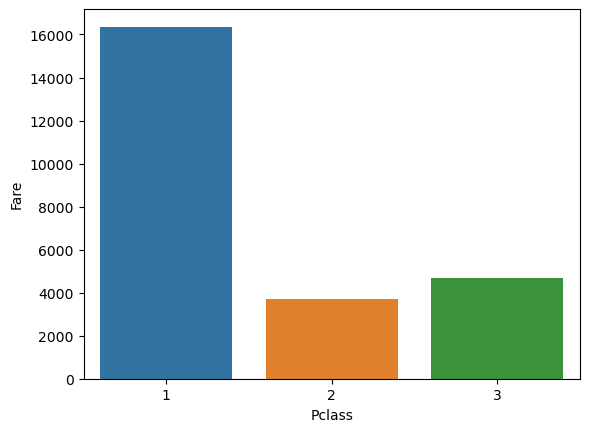

In [7]:
fare_for_class = df.groupby(["Pclass"],as_index = False)["Fare"].sum()
sns.barplot(x="Pclass",y="Fare",data = fare_for_class)

<Axes: xlabel='Pclass', ylabel='Age'>

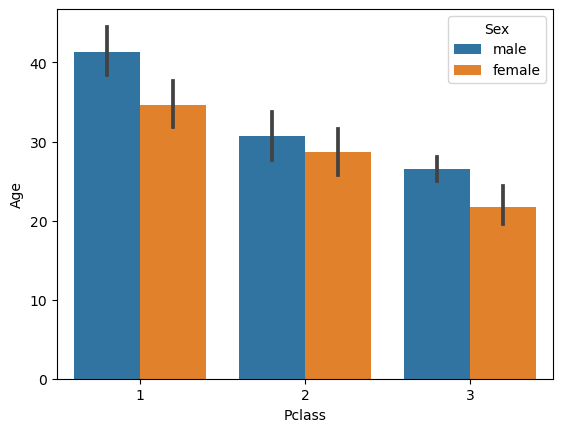

In [8]:
sns.barplot(x="Pclass",y="Age",data = df,hue = "Sex")

C:\Users\vikky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vikky\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Fare Distribution for each Passenger')

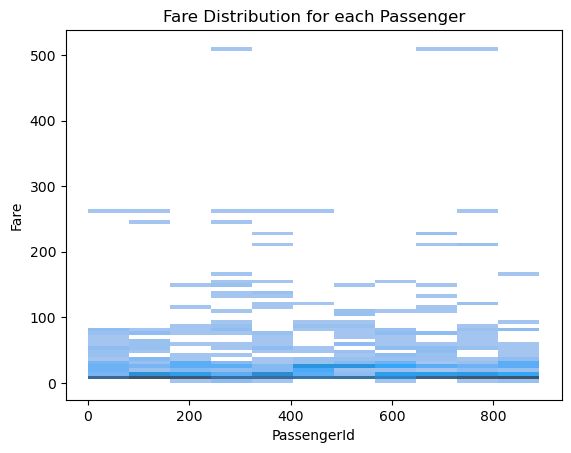

In [9]:
sns.histplot(x ="PassengerId",y= "Fare",data = df)
plt.title("Fare Distribution for each Passenger")

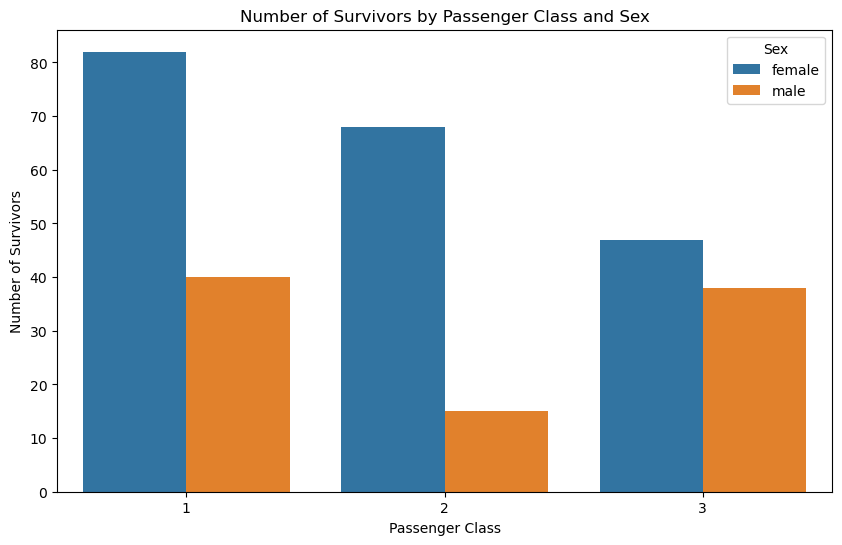

In [10]:
survived = df[df['Survived'] == 1]

# Group survivors by passenger class and sex, and count the number of survivors in each group
survivors_by_class_sex = survived.groupby(['Pclass', 'Sex']).size().reset_index(name='survived_count')

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='survived_count', hue='Sex', data=survivors_by_class_sex)
plt.title('Number of Survivors by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.show()